In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
import functions

import warnings
warnings.filterwarnings("ignore")

EDA User_Reviews

In [33]:
#Se lee el dataframe
df_reviews = pd.read_csv("data/australian_user_review.csv", encoding= "utf-8")

In [10]:
df_reviews.head()

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
2,evcentric,http://steamcommunity.com/id/evcentric,Formato invalido,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...,2
3,doctr,http://steamcommunity.com/id/doctr,2013-10-14,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...,2
4,maplemage,http://steamcommunity.com/id/maplemage,2014-04-15,211420,35 of 43 people (81%) found this review helpful,True,Git gud,1


Se revisa los porcentajes

In [11]:

functions.porcentaje(df_reviews,"sentiment_analysis")

,cantidad,Porcentaje
sentiment_analysis,,
2,32466,56.59
1,12573,21.92
0,12328,21.49


In [12]:
functions.porcentaje(df_reviews,"reviews_recommend")

,cantidad,Porcentaje
reviews_recommend,,
True,50751,88.47
False,6616,11.53


Se agrupan por Sentimiento y recomendacion

In [14]:
df_group = df_reviews.groupby(["sentiment_analysis","reviews_recommend"])


In [18]:
cant_group = df_group.size()

In [19]:
porcentaje_group = 100*df_group.size()/ len(df_reviews)

In [20]:
sentimiento = pd.DataFrame({
    "Cantidad": cant_group,
    "Porcentaje": porcentaje_group
})

In [21]:
sentimiento

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  3264    5.689682
                   True                   9064   15.800024
1                  False                  1458    2.541531
                   True                  11115   19.375251
2                  False                  1894    3.301550
                   True                  30572   53.291962

In [22]:
#Se revisa la cantidad de usuarios que recomendarion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 25132


In [29]:
#Se revisa la cantidad de fechas con formato invalido
print(f'La cantidad de fechas en formato inválido son: {len(df_reviews[df_reviews["reviews_posted"]=="Formato invalido"])}')


La cantidad de fechas en formato inválido son: 9768


Grafico para ver la distribucion de las recomendaciones

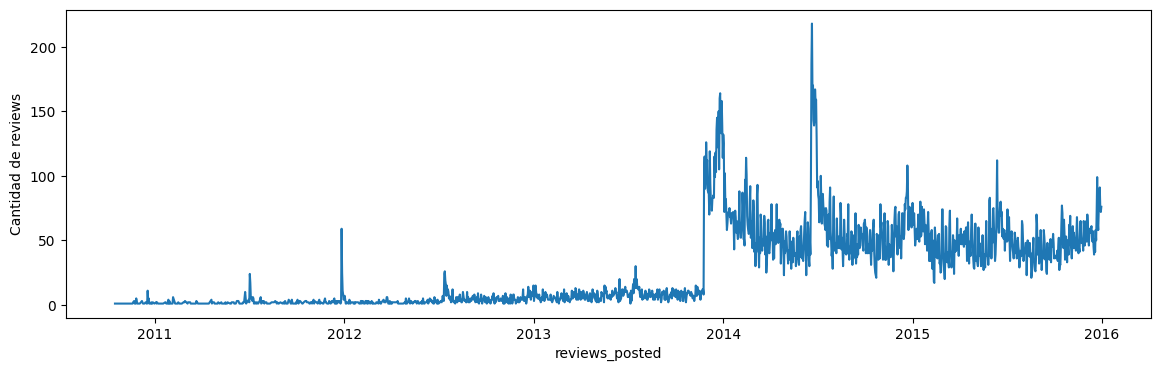

In [31]:
#Se extrae primero solo los que tienen fecha disponible
df = df_reviews[df_reviews["reviews_posted"].str.match(r"^\d{4}-\d{2}-\d{2}$")]

#se convierte el formato de fecha
df["reviews_posted"] = pd.to_datetime(df["reviews_posted"])
#se calcula la cantidad de review por fecha
df_count = df.groupby("reviews_posted").count()



#se grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=df_count, x="reviews_posted", y="reviews_recommend")
plt.ylabel('Cantidad de reviews')
plt.show()


EDA steam_games

In [5]:
df_games = pd.read_csv("data\output_steam_games.csv")
df_games.head()

,genres,price,early_access,id,release_year,publisher,app_name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [48]:
#Se revisa la cantidad de de juegos que hay registrados.
games = len(df_games["id"].unique())
print(f"Hay un total de juegos registrados de: {games}")

Hay un total de juegos registrados de: 28850


Genero de juego

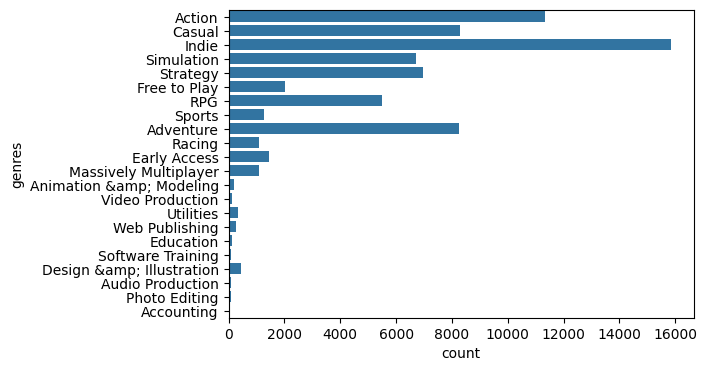

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_games, y ="genres", orient ="h")
plt.show()

In [40]:
functions.porcentaje(df_games, "genres")

,cantidad,Porcentaje
genres,,
Indie,15858,22.16
Action,11319,15.82
Casual,8282,11.57
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


Año de lanzamiento

In [41]:
functions.porcentaje(df_games,"release_year")[:20]

,cantidad,Porcentaje
release_year,,
2017,24967,34.89
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22
2012,2106,2.94
2011,986,1.38
Dato no disponible,850,1.19
2010,653,0.91


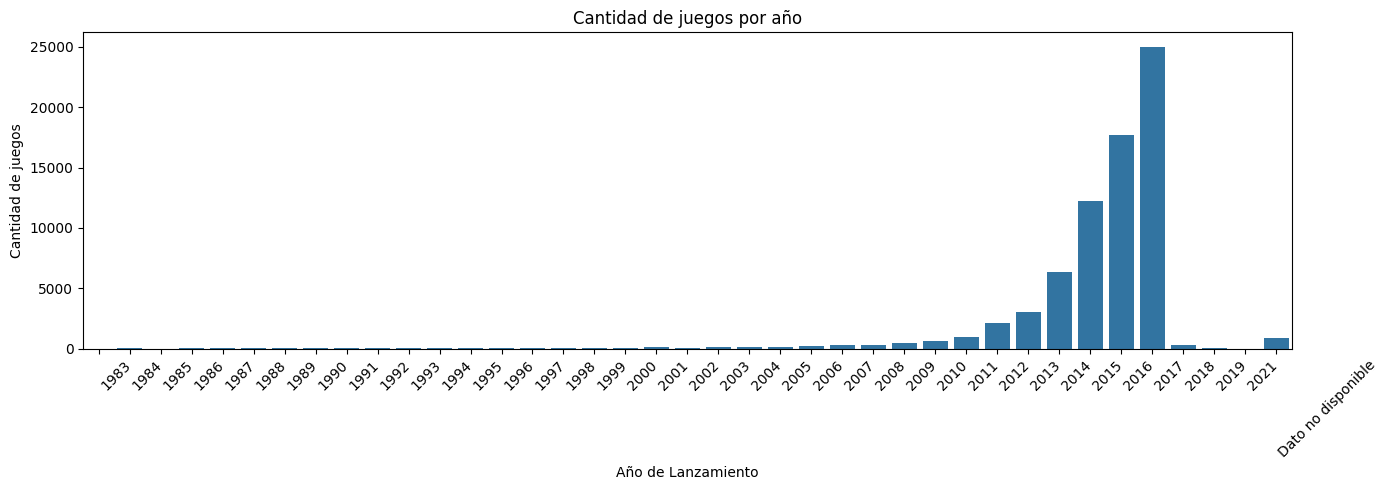

In [42]:
#Grafico que muestra la cantidad de juegos lanzados por año
count_year = df_games["release_year"].value_counts()
count_year = count_year.sort_index()
plt.figure(figsize=(14,5))
sns.barplot(x=count_year.index, y=count_year.values)
plt.xlabel("Año de Lanzamiento"); plt.ylabel("Cantidad de juegos"); plt.title("Cantidad de juegos por año")
plt.xticks(rotation =45,ha = "left")
plt.tight_layout()
plt.show()

In [53]:
#Se filtran los valores con año de lanzamiento
number_row = df_games[df_games["release_year"].str.isnumeric()]
#se convierten los valores a numeros entros
number_row["release_year"] = number_row["release_year"].astype(int)
#se revisan los juegos lanzados antes del 2003

row_pre_2003 = number_row[number_row["release_year"] <=2002] 
print(f"Cantidad de juegos lanzados antes del 2003:{len(row_pre_2003)}")
print(f"Cantidad de juegos con 'Dato no Disponible' :{df_games[df_games['release_year'] == 'Dato no disponible'].shape[0]}")

Cantidad de juegos lanzados antes del 2003:741
Cantidad de juegos con 'Dato no Disponible' :850


Los jeugos lanzados antes del 2003 puede lelgar a ser por error ya que la plataforma se lanzo en el 2003, aunque pueden ser juegos que salieron antes de la plataforma.
Los juegos con datos no disponible puede ser por que no estaba especificada o en un formato incorrecto.
Se ve un crecimiento acelerado entre el 2012 y el 2017.

Publisher y Developer

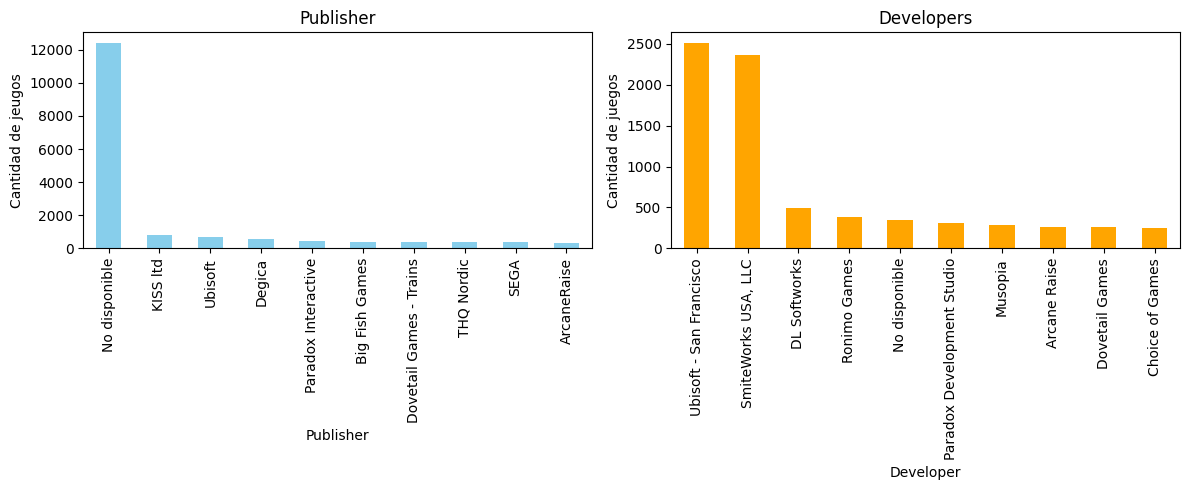

In [60]:
#Se cuentan la cantidad de juegos por publisher y por developer
count_publisher = df_games["publisher"].value_counts()
count_developer = df_games["developer"].value_counts()
#se crean dos subplot
plt.figure(figsize=(12,5))

#Subplot publisher
plt.subplot(1,2,1)
count_publisher[:10].plot(kind="bar", color="skyblue")
plt.xlabel("Publisher"); plt.ylabel("Cantidad de jeugos") ; plt.title("Publisher")

#Subplot developer
plt.subplot(1,2,2)
count_developer[:10].plot(kind="bar",color = "orange")
plt.xlabel("Developer"); plt.ylabel("Cantidad de juegos") ; plt.title("Developers")

plt.tight_layout()
plt.show()

Faltan muchos datos de Publisher.
Ubisoft y Smiteworks son los Desarrolladoes con mas juegos publicados en la plataforma.

Price

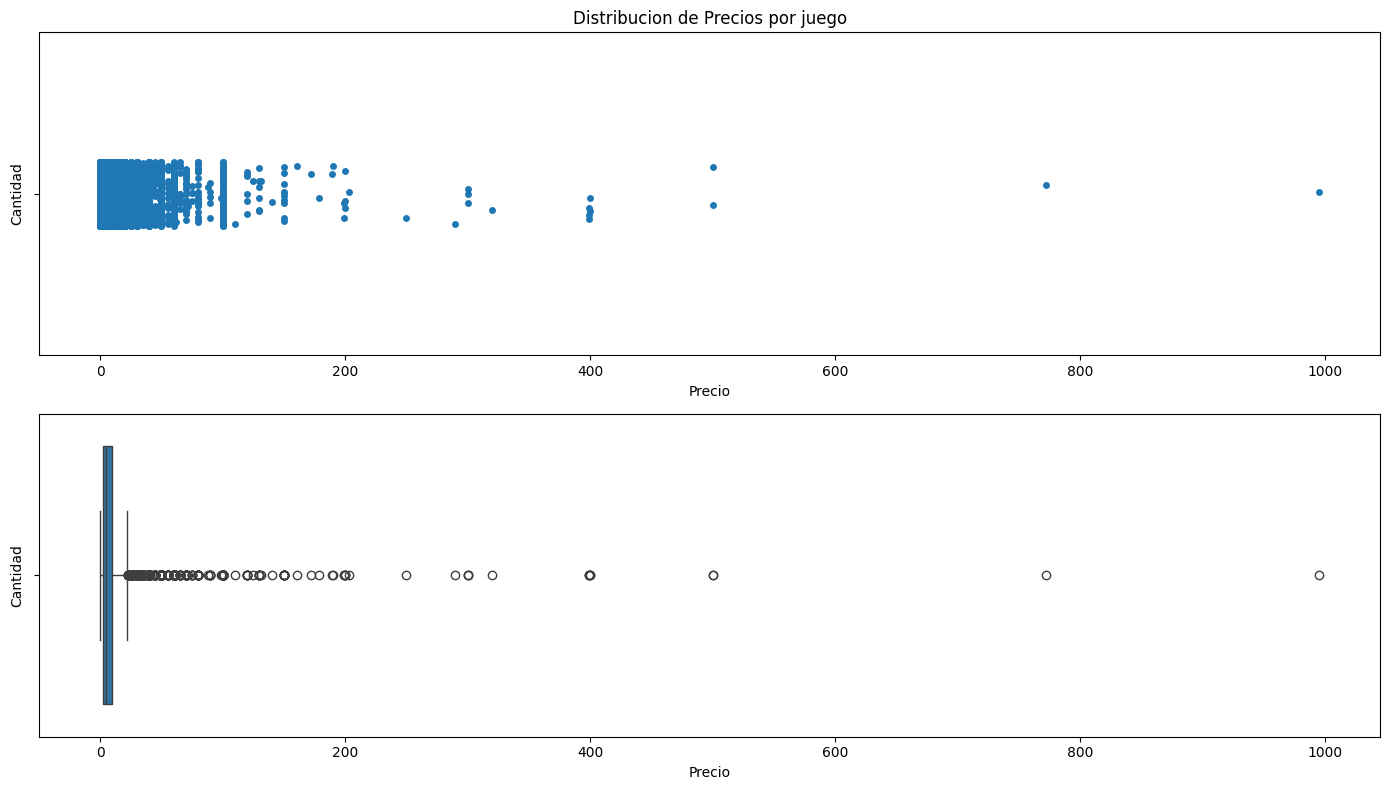

In [8]:
price = df_games.groupby("id")["price"].unique().reset_index().explode("price")
df_price = price[["id", "price"]]

fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_price, x="price",  ax=ax1)
ax1.set_xlabel("Precio")
ax1.set_ylabel("Cantidad")
ax1.set_title("Distribucion de Precios por juego")

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_price, x="price", ax=ax2)
ax2.set_xlabel("Precio")
ax2.set_ylabel("Cantidad")

plt.tight_layout()
plt.show()

In [13]:
df_price

,id,price
0,10,9.99
1,20,4.99
2,30,4.99
3,40,4.99
4,50,4.99
...,...,...
28845,2028055,24.99
28846,2028056,14.99
28847,2028062,49.99
28848,2028103,29.99


In [19]:
stats = df_price["price"].astype(float).describe()
print(f"El precio medio de los juegos es de:{stats[5]}")
print(f"EL precio promedio de los juegos es de:{round(stats[1],2)}")
print(f"El 75% de los juegos tiene un precio menor de: {stats[6]}")
functions. whisker_max(pd.DataFrame(df_price.astype(float))["price"])

El precio medio de los juegos es de:4.99
EL precio promedio de los juegos es de:8.62
El 75% de los juegos tiene un precio menor de: 9.99
El bigote superir de la variable price se ubica en: 21.99
Hay 1746 valores atipocs en la variable price


EDA users_items

In [4]:
df_items = pd.read_csv("data\oaustralian_users_items.csv")

In [5]:
df_items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


In [7]:
print(f"Cantidad de registros:{df_items.shape[0]}")
#se revisan los tipos de datos que tiene
functions.tipo_dato(df_items)

Cantidad de registros:5094105


,nombre_campo,tipo_dato,nulo,no_nulo%,nulo%
0,item_id,[<class 'int'>],0,100.0,0.0
1,item_name,[<class 'str'>],0,100.0,0.0
2,playtime_forever,[<class 'int'>],0,100.0,0.0
3,steam_id,[<class 'int'>],0,100.0,0.0
4,items_count,[<class 'int'>],0,100.0,0.0
5,user_id,[<class 'str'>],0,100.0,0.0
6,user_url,[<class 'str'>],0,100.0,0.0


Hay una cantidad de 5094105 de registros.
Contiene informacion relacionada a los usuarios. Incluyendo la cantidad de tiempo acumulado jugando cada juego.

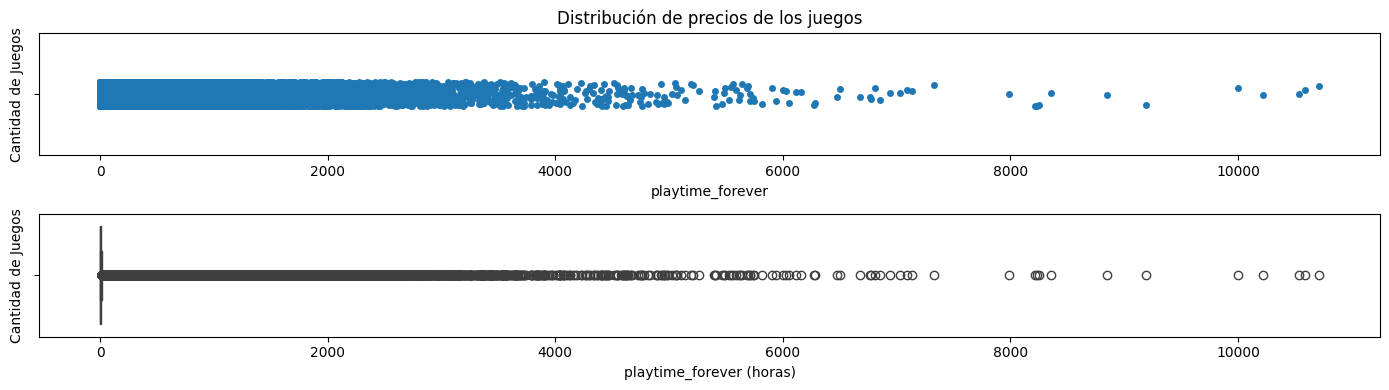

In [11]:
#Se genera una columna que contenga el tiempo jugado en horas
df_items["playtime_hour"] = df_items["playtime_forever"] /60

fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x="playtime_hour", ax=ax1)
ax1.set_xlabel("playtime_forever") ; ax1.set_ylabel("Cantidad de Juegos") ; ax1.set_title("Distribución de precios de los juegos")

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x="playtime_hour", ax=ax2)
ax2.set_xlabel("playtime_forever (horas)") ; ax2.set_ylabel("Cantidad de Juegos")

plt.tight_layout()
plt.show()

In [17]:
stats = df_items["playtime_hour"].describe()
print(f"El tiempo medio  de juego es de: {round(stats[5],2)}")
print(f"El tiempo promedio de juego es de: {round(stats[1],2)}")
print(f"El 75% de los juegadores tienen tiempo de juego menor a: {round(stats[6],2)}")
functions.whisker_max(df_items["playtime_hour"])

El tiempo medio  de juego es de: 0.57
El tiempo promedio de juego es de: 16.51
El 75% de los juegadores tienen tiempo de juego menor a: 5.92
El bigote superir de la variable playtime_hour se ubica en: 14.79
Hay 763606 valores atipocs en la variable playtime_hour


Se obserban una gran cantidad de valores atipicos. Puede ser por el uso de bots para o por el hecho de compartir el usuario para jugar un mismo juego.


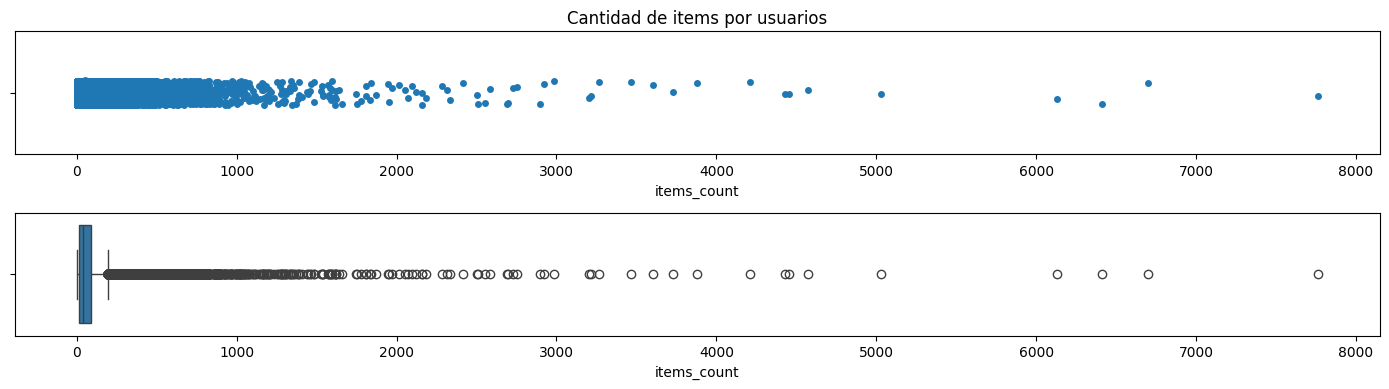

In [25]:
#se agrupan los items por usuario en un dataframe
items_count = pd.DataFrame(df_items.groupby("user_id")["items_count"].unique().explode()).sort_values("items_count", ascending = False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count, x="items_count", ax=ax1)
ax1.set_xlabel("items_count") ; ax1.set_title("Cantidad de items por usuarios")

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count, x="items_count", ax=ax2)
ax2.set_xlabel("items_count")

plt.tight_layout()
plt.show()



In [27]:
stats = df_items["items_count"].describe()
print(f"Cantidad media de juegos por usuario es de: {round(stats[5],2)}")
print(f"La cantidad promedio de juegos por usuario es de: {round(stats[1],2)}")
print(f"El 75% de los usuarios tienen una cantidad menor de jeugos a: {round(stats[6],2)}")
functions.whisker_max(df_items["items_count"])

Cantidad media de juegos por usuario es de: 137.0
La cantidad promedio de juegos por usuario es de: 315.73
El 75% de los usuarios tienen una cantidad menor de jeugos a: 275.0
El bigote superir de la variable items_count se ubica en: 581.0
Hay 510013 valores atipocs en la variable items_count


El usuario con mas juegos adquiridos tiene poco menos de 8000, pero la mayoria de los usuraios (el 75%) tiene menos de 87.
Hay 4957 usuarios con una cantidad de items adquirida que se podria consiedar como atipica, mas de 196 cada uno.

Modelo de Recomendacion.

Para el Modelo de recomendacion se pide que devuelva una lista de 5 juegos a partir de el nombre de un juego o el id de un usuario.

In [30]:
#Se revisa el dataframe reviews e items
df_items.head(5)

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url,playtime_hour
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.100000
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.000000
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.116667
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.000000
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.000000


In [34]:
df_reviews.head(5)

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
2,evcentric,http://steamcommunity.com/id/evcentric,Formato invalido,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...,2
3,doctr,http://steamcommunity.com/id/doctr,2013-10-14,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...,2
4,maplemage,http://steamcommunity.com/id/maplemage,2014-04-15,211420,35 of 43 people (81%) found this review helpful,True,Git gud,1


Con los datos que dispones se crea un sistema de puntake, para los juegos se considera el analsis de sentimientos de las reviews( 0 Negativo, 1 Netural, 2 Positivo) y las recomendaciones(True o False).
Se considera crear un puntaje del 1 al 5, siendo 1 nada recomendado y 5 muy recomendado.

In [35]:
def raiting(fila):
    '''
    Calcula el puntaje basandose en el analisis de sentimientos y la recomendacion del usuario.

    parameters:
    fila (dict):Diccionario que contiene:
        - sentiment_analysis (int) : La puntuacion del analsis de sentimiento.
        - reviews_recommend	(bool) : Si es recomendado o no por el usuario

    returns:
        int o None:El puntaje calculado entre 1 y 5, o None si no hay datos validos.

    '''

    if fila["sentiment_analysis"] == 0 and not fila["reviews_recommend"]:
        return 1
    elif fila["sentiment_analysis"] == 0 and fila["reviews_recommend"]:
        return 1
    elif fila["sentiment_analysis"] == 1 and not fila["reviews_recommend"]:
        return 2
    elif fila["sentiment_analysis"] == 1 and fila["reviews_recommend"]:
        return 3
    elif fila["sentiment_analysis"] == 2 and not fila["reviews_recommend"]:
        return 4
    elif fila["sentiment_analysis"] == 2 and fila["reviews_recommend"]:
        return 5
    else:
        return None
            

In [37]:
#Se aplica la funcion raiting sobre df_reviews
df_reviews["raiting"] = df_reviews.apply(raiting, axis =1)
df_reviews

,user_id,user_url,reviews_posted,reviews_item_id,reviews_helpful,reviews_recommend,reviews_review,sentiment_analysis,raiting
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2,5
1,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2,5
2,evcentric,http://steamcommunity.com/id/evcentric,Formato invalido,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...,2,5
3,doctr,http://steamcommunity.com/id/doctr,2013-10-14,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...,2,5
4,maplemage,http://steamcommunity.com/id/maplemage,2014-04-15,211420,35 of 43 people (81%) found this review helpful,True,Git gud,1,3
...,...,...,...,...,...,...,...,...,...
57362,How51,http://steamcommunity.com/id/How51,2014-08-15,440,No ratings yet,True,TF2 is alot of fun and its really good but the...,2,5
57363,76561198111410893,http://steamcommunity.com/profiles/76561198111...,2014-08-02,304930,No ratings yet,True,Fun game with friends,0,1
57364,zaza147,http://steamcommunity.com/id/zaza147,2015-07-31,265630,No ratings yet,True,So Fun!! :D,2,5
57365,lifeonhigh,http://steamcommunity.com/id/lifeonhigh,2015-12-20,304050,No ratings yet,True,"This game is great. The only thing is,Why cant...",2,5


In [39]:
#se crea un dataframe con las columnas que vamos a usar
df_raiting = df_reviews[["user_id", "reviews_item_id", "raiting"]]
df_raiting


,user_id,reviews_item_id,raiting
0,76561197970982479,1250,5
1,js41637,251610,5
2,evcentric,248820,5
3,doctr,250320,5
4,maplemage,211420,3
...,...,...,...
57362,How51,440,5
57363,76561198111410893,304930,1
57364,zaza147,265630,5
57365,lifeonhigh,304050,5


In [41]:
df_items.head(2)

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url,playtime_hour
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.1
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0.0


In [44]:
#se crea un dataframe con los jeugos con recomendaciones
df_games_items = df_items[["item_id","item_name"]]
#se eliminan los duplicaods
df_games_items.drop_duplicates(inplace=True)


In [47]:
#se agregan los nombres de los juegos a dataframe con el raiting
df_games_raiting = df_raiting.merge(df_games_items, left_on ="reviews_item_id", right_on ="item_id", how="left")
df_games_raiting

,user_id,reviews_item_id,raiting,item_id,item_name
0,76561197970982479,1250,5,1250.0,Killing Floor
1,js41637,251610,5,251610.0,Barbie™ Dreamhouse Party™
2,evcentric,248820,5,248820.0,Risk of Rain
3,doctr,250320,5,250320.0,The Wolf Among Us
4,maplemage,211420,3,211420.0,Dark Souls: Prepare to Die Edition
...,...,...,...,...,...
57362,How51,440,5,NaN,NaN
57363,76561198111410893,304930,1,304930.0,Unturned
57364,zaza147,265630,5,265630.0,Fistful of Frags
57365,lifeonhigh,304050,5,304050.0,Trove


Se observan algunos juegos que tienen recomendaciones pero esos juegos no estan en el dataframe.

In [48]:
#Se revisan los nulos
functions.tipo_dato(df_games_raiting)


,nombre_campo,tipo_dato,nulo,no_nulo%,nulo%
0,user_id,[<class 'str'>],0,100.00,0.00
1,reviews_item_id,[<class 'int'>],0,100.00,0.00
2,raiting,[<class 'int'>],0,100.00,0.00
3,item_id,[<class 'float'>],6328,88.97,11.03
4,item_name,"[<class 'str'>, <class 'float'>]",6328,88.97,11.03


In [54]:
#se revisan la cantidad de juegos con reviews que no estan en el dataframe
no_df =df_games_raiting[df_games_raiting.isnull().any(axis=1)]

print(f"Hay {len(no_df['reviews_item_id'].unique())}  juegos con reviews que no estan en el dataframe")
no_df

Hay 354  juegos con reviews que no estan en el dataframe


,user_id,reviews_item_id,raiting,item_id,item_name
10,76561198077246154,440,3,NaN,NaN
19,devvonst,440,5,NaN,NaN
28,76561198076909484,570,1,NaN,NaN
36,boydeer,440,3,NaN,NaN
43,jarrodtrim,440,5,NaN,NaN
...,...,...,...,...,...
57323,ViniReaper,440,5,NaN,NaN
57346,BlinkV1,440,5,NaN,NaN
57353,76561198095035915,440,1,NaN,NaN
57362,How51,440,5,NaN,NaN


In [55]:
#Se decide borrar esas reviews.
df_games_raiting = df_games_raiting.dropna(subset=["item_id"])
#se verifican los tipos de datos.
functions.tipo_dato(df_games_raiting)

,nombre_campo,tipo_dato,nulo,no_nulo%,nulo%
0,user_id,[<class 'str'>],0,100.0,0.0
1,reviews_item_id,[<class 'int'>],0,100.0,0.0
2,raiting,[<class 'int'>],0,100.0,0.0
3,item_id,[<class 'float'>],0,100.0,0.0
4,item_name,[<class 'str'>],0,100.0,0.0


In [57]:
#se crea un dataframe con el que entrenar al modelo
df_modelo_recomendacion = df_games_raiting[["user_id","item_name","raiting"]]

Graficos apra ver la distribuciion de los puntajes

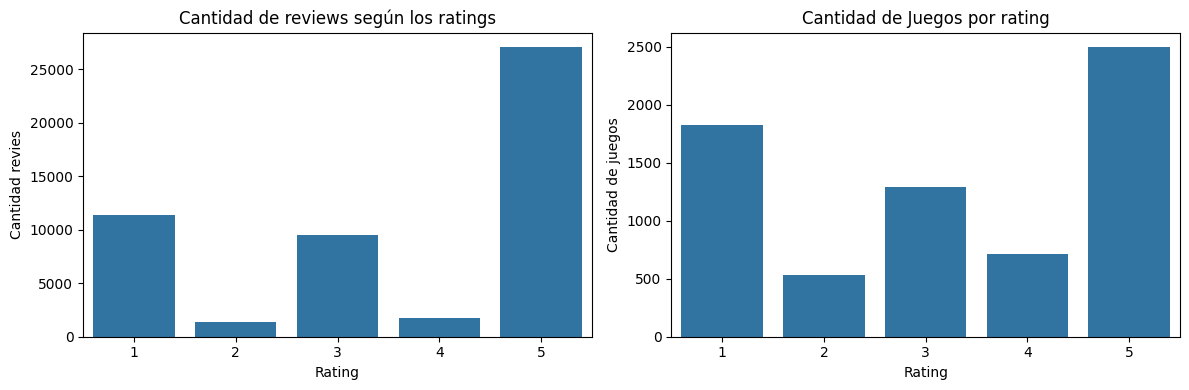

In [65]:
ratings_count = df_modelo_recomendacion["raiting"].value_counts().reset_index()
ratings_count.columns = ["raiting", "count"]
# Agrupa los juegos únicos por rating
unique_games_rating = df_modelo_recomendacion.groupby("raiting")["item_name"].nunique().reset_index()

# Crea una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Primer subplot
sns.barplot(data=ratings_count, x="raiting", y="count", ax=axes[0])
axes[0].set_title("Cantidad de reviews según los ratings") ; axes[0].set_xlabel("Rating") ; axes[0].set_ylabel("Cantidad revies")

# Segundo subplot
sns.barplot(data=unique_games_rating, x="raiting", y="item_name", ax=axes[1])
axes[1].set_title("Cantidad de Juegos por rating") ; axes[1].set_xlabel("Rating") ; axes[1].set_ylabel("Cantidad de juegos")

# Ajusta y muestra los graficos
plt.tight_layout()
plt.show()

In [64]:
#Se revisan los porcentajes
functions.porcentaje(df_modelo_recomendacion,"raiting")

,cantidad,Porcentaje
raiting,,
5,27029,52.96
1,11375,22.29
3,9517,18.65
4,1775,3.48
2,1343,2.63


In [66]:
unique_games_rating

,raiting,item_name
0,1,1824
1,2,534
2,3,1287
3,4,712
4,5,2495


In [68]:
df_modelo_recomendacion.to_csv("data\df_modelo_recomendacion.csv", index =False, encoding = "utf-8")
print("Se gaurdo correctamente")

Se gaurdo correctamente
